# Стохастический градиентный и координатный спуски

## Загрузка и подготовка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd                    # для работы с DataFrame
import numpy as np                     # для работы с массивами
import matplotlib.pyplot as plt        # библиотека для визуализации статистических данных, построения данных
import seaborn as sns                  # библиотека для визуализации статистических данных, построения данных
from sklearn.linear_model import LinearRegression      # алгоритм линейной регрессии
from sklearn.metrics import mean_squared_error         # среднеквадратичная ошибка из модуля метрик

Файл для загрузки: https://lms-cdn.skillfactory.ru/assets/courseware/v1/be9ea3bcfb9e5ebc744c1f2af98fed61/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/Advertising.zip

In [2]:
# загрузка файла
df = pd.read_csv('Advertising.zip', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# посмотрим на общую информацию о признаках
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


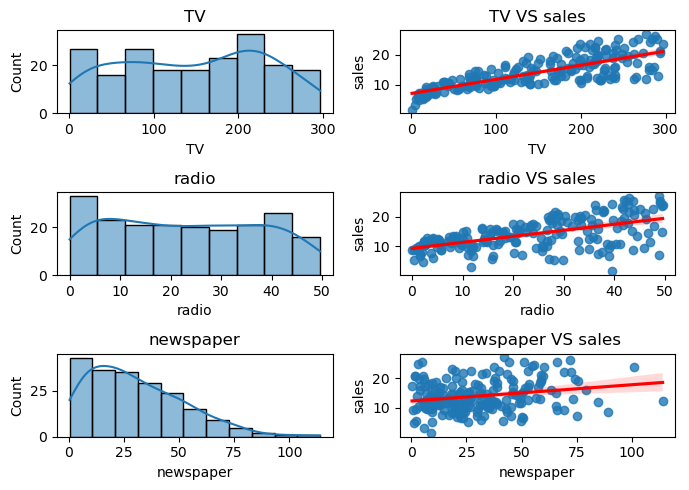

In [4]:
# создание координатной плоскости
fig, axes = plt.subplots(3, 2, figsize=(7, 5))
# цикл для признаков датасета без таргета
for i, feature in enumerate(df.drop(['sales'], axis=1).columns):
    # строим гистограмму распределения признака 
    histplot = sns.histplot(data=df, x=feature, kde=True, ax=axes[i][0])
    # название гистограммы
    histplot.set_title('{}'.format(feature))
    # строим диаграмму рассеяния + линейную регрессию в зависимости от целевого признака
    regplot = sns.regplot(data=df, x=feature, y='sales', line_kws=dict(color="r"), ax=axes[i][1])
    # название графика
    regplot.set_title('{} VS sales'.format(feature));
plt.tight_layout()    # выравнивание графиков                                             

**Пропусков нет, все данные числовые (но без нормального распределения) и мы можем приступить к решению задачи: предсказанию продаж - целевая переменная *sales***.

**Преобразуем признаки в массивы NumPy и разделим их на переменные X (предикторы) и y (целевая переменная)** 

In [5]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']
# определим переменную: количество объектов
n = len(y)
# формируем матрицу значений с добавлением столбца из единиц для создания свободного коэффициента в уравнении регрессии
X = np.append(np.ones((n,1)), X.values.reshape(n,3), axis = 1)
# преобразование в двумерный массив целевой переменной
y = df['sales'].values.reshape(n,1)

print(f'Размерность матрицы наблюдений(предикторы): {X.shape}', f'Размерность вектора правильных ответов: {y.shape}', sep='\n')

Размерность матрицы наблюдений(предикторы): (200, 4)
Размерность вектора правильных ответов: (200, 1)


## Координатный спуск

**Нормализуем данные для корректной работы алгоритма**

In [6]:
# каждое значение матрицы разделим на евклидово расстояние между значениями
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Алгоритм координатного спуска:** 

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *В данной записи текущий признак под номером $k$ не участвует в сумме. Для сравнения с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

In [7]:
# задаем количество итераций
num_iter = 1000
# создаем вектор весов пока с нулевыми значениями двумерной размерности (количество столбцов матрицы)
w = np.zeros((X.shape[1],1))
# осуществляем цикл по количеству итераций
for i in range(num_iter):
    # осуществляем цикл по признакам (предикторам)
    for k in range(X.shape[1]):
        # вычисляем прогноз линейной регрессии для k признака
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # находим коэффициент обновленного k
        w[k] = X[:,k].T @ (y - h)
        # вычисляем функцию потерь - среднеквадратичную ошибку
        cost = (((X @ w) - y)**2).mean()
mse_ols = np.round(cost, 5)
w_ols = list(np.round(w, 5))
print('Вектор коэффициентов уравнения регрессии, т.н. вектор весов: ', *w_ols)
print('MSE по методу координатного спуска: ', mse_ols)

Вектор коэффициентов уравнения регрессии, т.н. вектор весов:  [41.56217] [110.13144] [73.52861] [-0.55006]
MSE по методу координатного спуска:  2.78413


Сравним полученные значения вектора весов с коэффициентами при реализации линейной регрессии из библиотеки sklearn:

In [8]:
# инициализируем алгоритм линейной регрессии 
model = LinearRegression(fit_intercept=False)
# обучем модель
model.fit(X, y)

# предсказываем целевую переменную и посмотрим на среднеквадратичную ошибку
y_predict = model.predict(X)
mse_linregr = np.round(mean_squared_error(y, y_predict),5)
print('MSE модели линейной регрессии: ', mse_linregr)

# посмотрим на коэффициенты регрессии и сравним их с коэффициентами, полученными вручную:
w_linregr= list(np.round(model.coef_[0], 5))
# оформим значения коэффициентов в датафрейм
coef_df = pd.DataFrame({'Coef manual coordinate descent': [w_ols[0][0], w_ols[1][0], w_ols[2][0], w_ols[3][0]],
                        'Coef sklearn' : [i for i in w_linregr]}) 
coef_df

MSE модели линейной регрессии:  2.78413


,Coef manual coordinate descent,Coef sklearn
0,41.56217,41.56217
1,110.13144,110.13144
2,73.52861,73.52861
3,-0.55006,-0.55006


**Мы видим, что коэффициенты регрессии, полученные ручным способом методом координатного спуска очень похожи на коэффициенты, полученнные с помощью алгоритма линейной регрессии из библиотеки sklearn. И соответственно, значение функции потерь идентичны, что говорит нам, что мы правильно решили задачу предсказания целевой переменной.**

## Стохастический градиентный спуск

**Масшабируем столбцы исходной матрицы *X*  по принципу: вычесть из каждого значения среднее и разделить на стандартное отклонение**

In [9]:
# отделяем целевой признак от матрицы значений
X = df.drop('sales', axis=1).values
# маштабируем: из каждого значения вычитаем среднее и делим на стандартное отклонение
X = (X - np.mean(X, axis=0))/np.std(X,axis=0)
X.shape

(200, 3)

**Добавим единичный столбец**

In [10]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])  # преобразуем в двумерный массив
X.shape

(200, 4)

**Создим функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse**

In [11]:
def mse_error(y, y_pred):
    return ((y-y_pred)**2).mean() # суммируем разницы между реальным и предсказанным значениями, возведенными в квадрат, 
                                  # результат делим на количество наблюдений, т.е берем среднее арифметическое

**Осуществим наивный прогноз: предскажим продажи средним значением.**

In [12]:
# вычисляем среднее арифметическое значение целевой переменной
y_mean = np.array([np.mean(y)])
print("Наивный прогноз (среднее значение продаж):", y_mean[0])
print("MSE для наивного прогноза:", np.round(mse_error(y, y_mean),5))

Наивный прогноз (среднее значение продаж): 14.0225
MSE для наивного прогноза: 27.08574


**Создадим функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** 

In [13]:
def lin_pred(X, w):
    return (X @ w)

**Создадим функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска.**\
**Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Алгоритм функцию:
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [14]:
def stoch_grad_step(X, y, w, train_ind, eta):
    # X - матрица предикторов
    # y - вектор правильных ответов
    # w - вектор весов
    # train_ind - индекс наблюдения матрицы
    # eta - шаг градиентного спуска, задается вручную
    gradient = (X[train_ind]*2*((X[train_ind] @ w) - y[train_ind])/len(y)).reshape(-1,1)
    # обновляем вектор весов
    new_w = gradient*eta
    # возвращаем разницу между весами(коэффициентами регрессии)
    return (w - new_w)

**Создадим функцию *stochastic_gradient_descent* для реализации стохастического градиентного спуска**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) будем сохранять текущее значение среднеквадратичной ошибки. Функция возвращает вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализировать расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создать пустой список для фиксации ошибок
* Создать счетчик итераций
* Реализовать оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерировать случайный индекс, сохранить текущую ошибку в вектор ошибок, записать в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Рассчитать текущее расстояние между векторами весов и прибавить к счетчику итераций 1.
* Вернуть вектор весов и вектор ошибок.

In [15]:
def stochastic_gradient_descent(X, y, w, eta, max_iter, epsilon=1e-20):
    distance = 1e+10                                                  # расстояние между веторами
    errors = []                                                       # список ошибок
    iter = 0                                                          # счетчик итераций
    # создаем цикл пока расстояние между векторами весов не будем меньше определенного или пока не закончатся итерации
    while distance > epsilon and iter < max_iter:
        ind = np.random.randint(X.shape[0])         # задаем индекс рандомного элемента из матрицы предикторов
        y_pred = lin_pred(X,w)                      # предсказываем целевую переменную
        errors.append(mse_error(y, y_pred))         # вычисляем mse и добавляем результат в список ошибок
        w_new = stoch_grad_step(X, y, w, ind, eta)  # обновляем веса с помощью функции шага стохастического градиентого спуска
        distance = np.linalg.norm(w-w_new)          # определяем расстояние между векторами весов(длина вектора разницы)
        w = w_new                                   # обновлленные веса сохраняем в вектор весов
        iter += 1                                   # обновляем счетчик итераций
    # возвращаем вектор весов и список ошибок
    return w, errors

In [26]:
# применим созданную функцию: изначально определим вектор весов нулевым,
# количество итерации зададим 10^5, шаг градиентного спуска = 0.01
w, errors = stochastic_gradient_descent(X, y, w=np.zeros(X.shape[1]), eta=0.005, max_iter=1e+6)

**Визуализируем список ошибок**

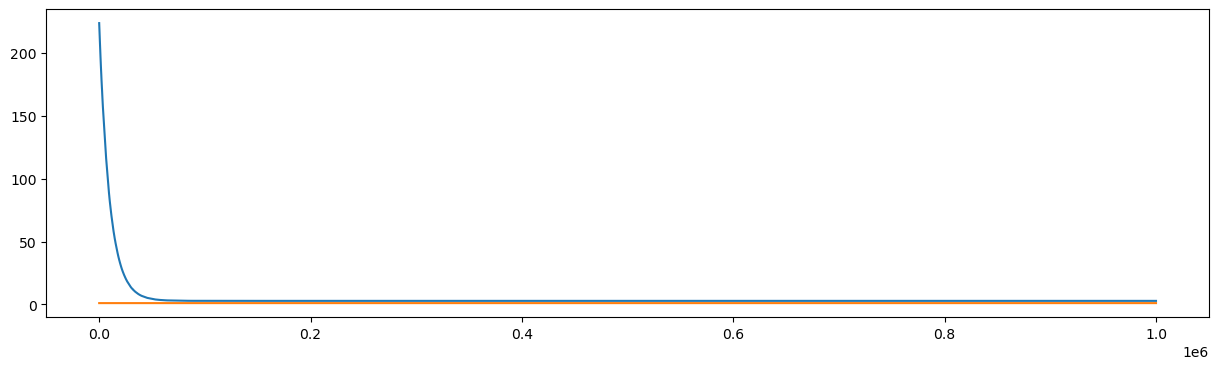

In [27]:
plt.figure(figsize=(15,4))
plt.plot(errors)
plt.plot(np.ones_like(errors));

**Посмотрим на вектор весов, к которому мы достигли заданного расстояния.**

In [28]:
w_sag = np.round(w[-1],5)
print(*w_sag)

-0.03 -0.03 -0.03 -0.03


**Какую среднеквадратичную ошибку мы получили на последней итерации.**

In [29]:
mse_sag = round(errors[-1], 5)
mse_sag

2.78424

In [30]:
result_df = pd.DataFrame({'Алгоритмы': ['Coordinate Descent', 'Stochastic Gradient Descent', 'Linear Regression sklearn'],
                          'Значение MSE': [mse_ols, mse_sag, mse_linregr],
                          'Вектор коэффциентов регрессии': [w_ols, w_sag, w_linregr]})
result_df

,Алгоритмы,Значение MSE,Вектор коэффциентов регрессии
0,Coordinate Descent,2.78413,"[[41.56217], [110.13144], [73.52861], [-0.55006]]"
1,Stochastic Gradient Descent,2.78424,"[-0.03, -0.03, -0.03, -0.03]"
2,Linear Regression sklearn,2.78413,"[41.56217, 110.13144, 73.52861, -0.55006]"


## Заключение
Мы решили задачу линейной регрессии различными методами, результаты качества близки по значению.\
На данном примере мы показали "изнанку" некоторых алгоритмов оптимизации, градиентный спуск очень популярный и эффективный метод оптимизации и имеет широкое применение, поэтому понимание его механизма поможет правильно его применять и настраивать.
